In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/PGA53/Model_Web_App/me_cfs_vs_depression.csv')
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [3]:
df.shape

(1000, 16)

In [4]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

,0
sleep_quality_index,47
brain_fog_level,48
physical_pain_score,34
stress_level,48
depression_phq9_score,22
fatigue_severity_scale_score,21
pem_duration_hours,24
hours_of_sleep_per_night,21
work_status,47
social_activity_level,40


In [5]:
nv_feat_num = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtypes!='object']
print(nv_feat_num)
nv_feat_cat = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtypes=='object']
print(nv_feat_cat)

['sleep_quality_index', 'brain_fog_level', 'physical_pain_score', 'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score', 'pem_duration_hours', 'hours_of_sleep_per_night']
['work_status', 'social_activity_level', 'exercise_frequency', 'meditation_or_mindfulness']


In [6]:
len(nv_feat_num)

8

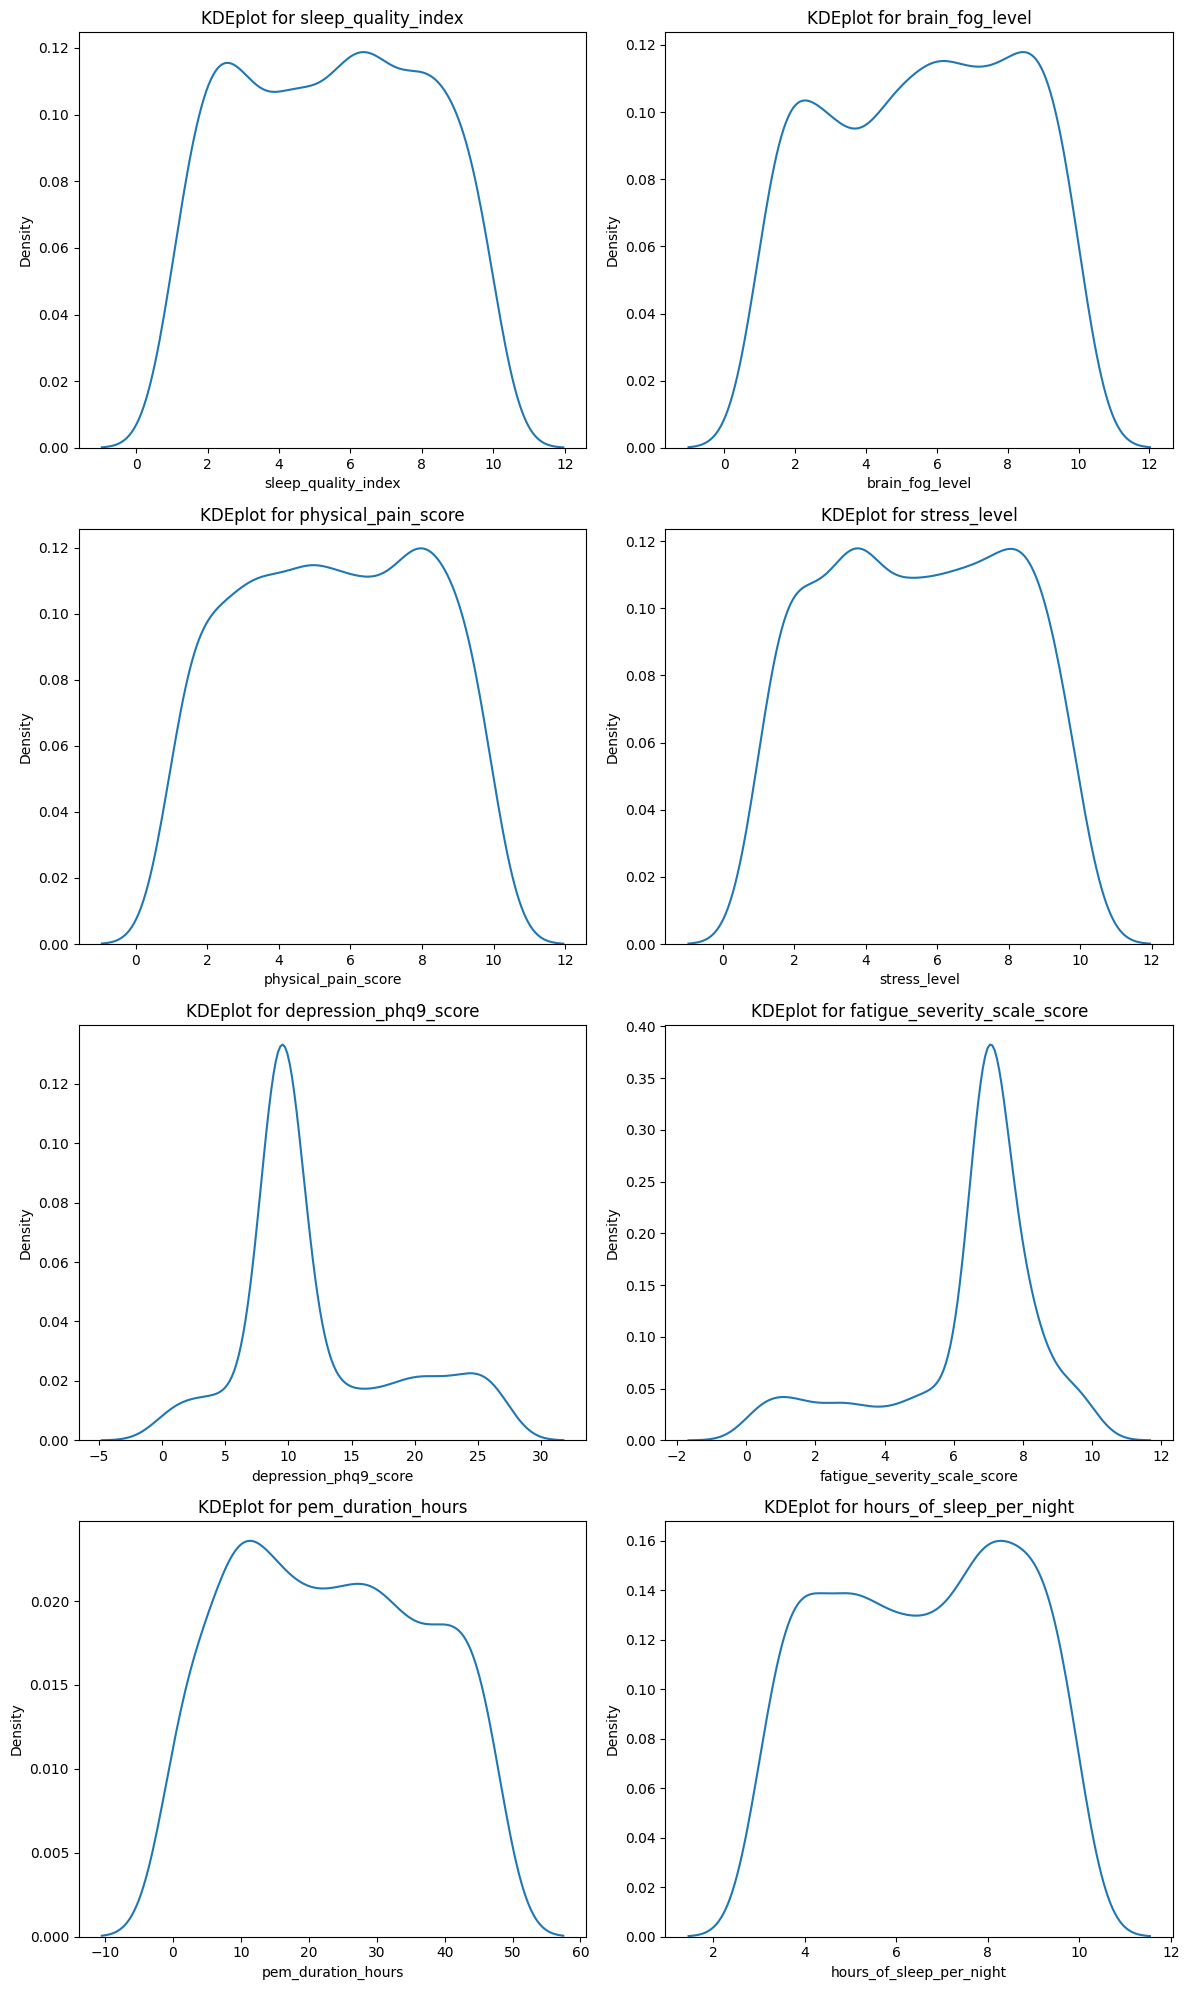

In [7]:
cols = nv_feat_num
plt.figure(figsize =(12,20))  # width = 12, height = 20
for i in range(len(cols)):
  plt.subplot(4,2,i+1)
  sns.kdeplot(x=df[cols[i]])
  plt.title(f'KDEplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [8]:
df1 = df.copy()

In [9]:
for i in nv_feat_num:
  if i not in ['depression_phq9_score', 'fatigue_severity_scale_score']:
    df[i] = df[i].fillna(df[i].mean())
  else:
    df[i] = df[i].fillna(df[i].median())

In [10]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

,0
work_status,47
social_activity_level,40
exercise_frequency,39
meditation_or_mindfulness,11


In [11]:
for i in nv_feat_cat:
  print(df[i].value_counts())

work_status
Partially working    335
Working              320
Not working          298
Name: count, dtype: int64
social_activity_level
Very low     203
High         200
Low          190
Very high    186
Medium       181
Name: count, dtype: int64
exercise_frequency
Rarely       210
Often        202
Daily        194
Sometimes    184
Never        171
Name: count, dtype: int64
meditation_or_mindfulness
Yes    505
No     484
Name: count, dtype: int64


In [12]:
def fill_cat_null_val(feat,n,p):
  val = df[feat].value_counts().head(n).index
  fill_val = np.random.choice(val,size=df[feat].isnull().sum(),p=p)
  nv_indx = df[df[feat].isnull()].index
  df.loc[nv_indx,feat] = fill_val

In [13]:
fill_cat_null_val('work_status',3,p=[0.34,0.33,0.33])

In [14]:
fill_cat_null_val('social_activity_level',2,p=[0.50,0.50])
fill_cat_null_val('exercise_frequency',2,p=[0.50,0.50])
fill_cat_null_val('meditation_or_mindfulness',2,p=[0.50,0.50])

In [15]:
for i in nv_feat_cat:
  print(df[i].value_counts())

work_status
Partially working    345
Working              340
Not working          315
Name: count, dtype: int64
social_activity_level
Very low     229
High         214
Low          190
Very high    186
Medium       181
Name: count, dtype: int64
exercise_frequency
Rarely       228
Often        223
Daily        194
Sometimes    184
Never        171
Name: count, dtype: int64
meditation_or_mindfulness
Yes    509
No     491
Name: count, dtype: int64


In [16]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

,0


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.dtypes

,0
age,int64
gender,object
sleep_quality_index,float64
brain_fog_level,float64
physical_pain_score,float64
stress_level,float64
depression_phq9_score,float64
fatigue_severity_scale_score,float64
pem_duration_hours,float64
hours_of_sleep_per_night,float64


In [19]:
df.describe()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.385000,5.468625,5.611765,5.521843,5.459139,12.219000,6.419700,23.105533,6.571297,0.599000
std,15.321669,2.510206,2.584885,2.521426,2.504119,6.245642,2.185273,13.656890,2.018762,0.490346
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,31.750000,3.300000,3.400000,3.500000,3.400000,9.000000,6.400000,12.000000,4.800000,0.000000
50%,45.000000,5.468625,5.611765,5.521843,5.459139,10.000000,7.000000,23.000000,6.585649,1.000000
75%,57.000000,7.600000,7.800000,7.700000,7.600000,15.000000,7.400000,34.250000,8.300000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000


In [20]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['gender', 'work_status', 'social_activity_level', 'exercise_frequency',
       'meditation_or_mindfulness', 'diagnosis'],
      dtype='object')
Index(['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score',
       'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score',
       'pem_duration_hours', 'hours_of_sleep_per_night', 'pem_present'],
      dtype='object')


#### Univariate - Countplot

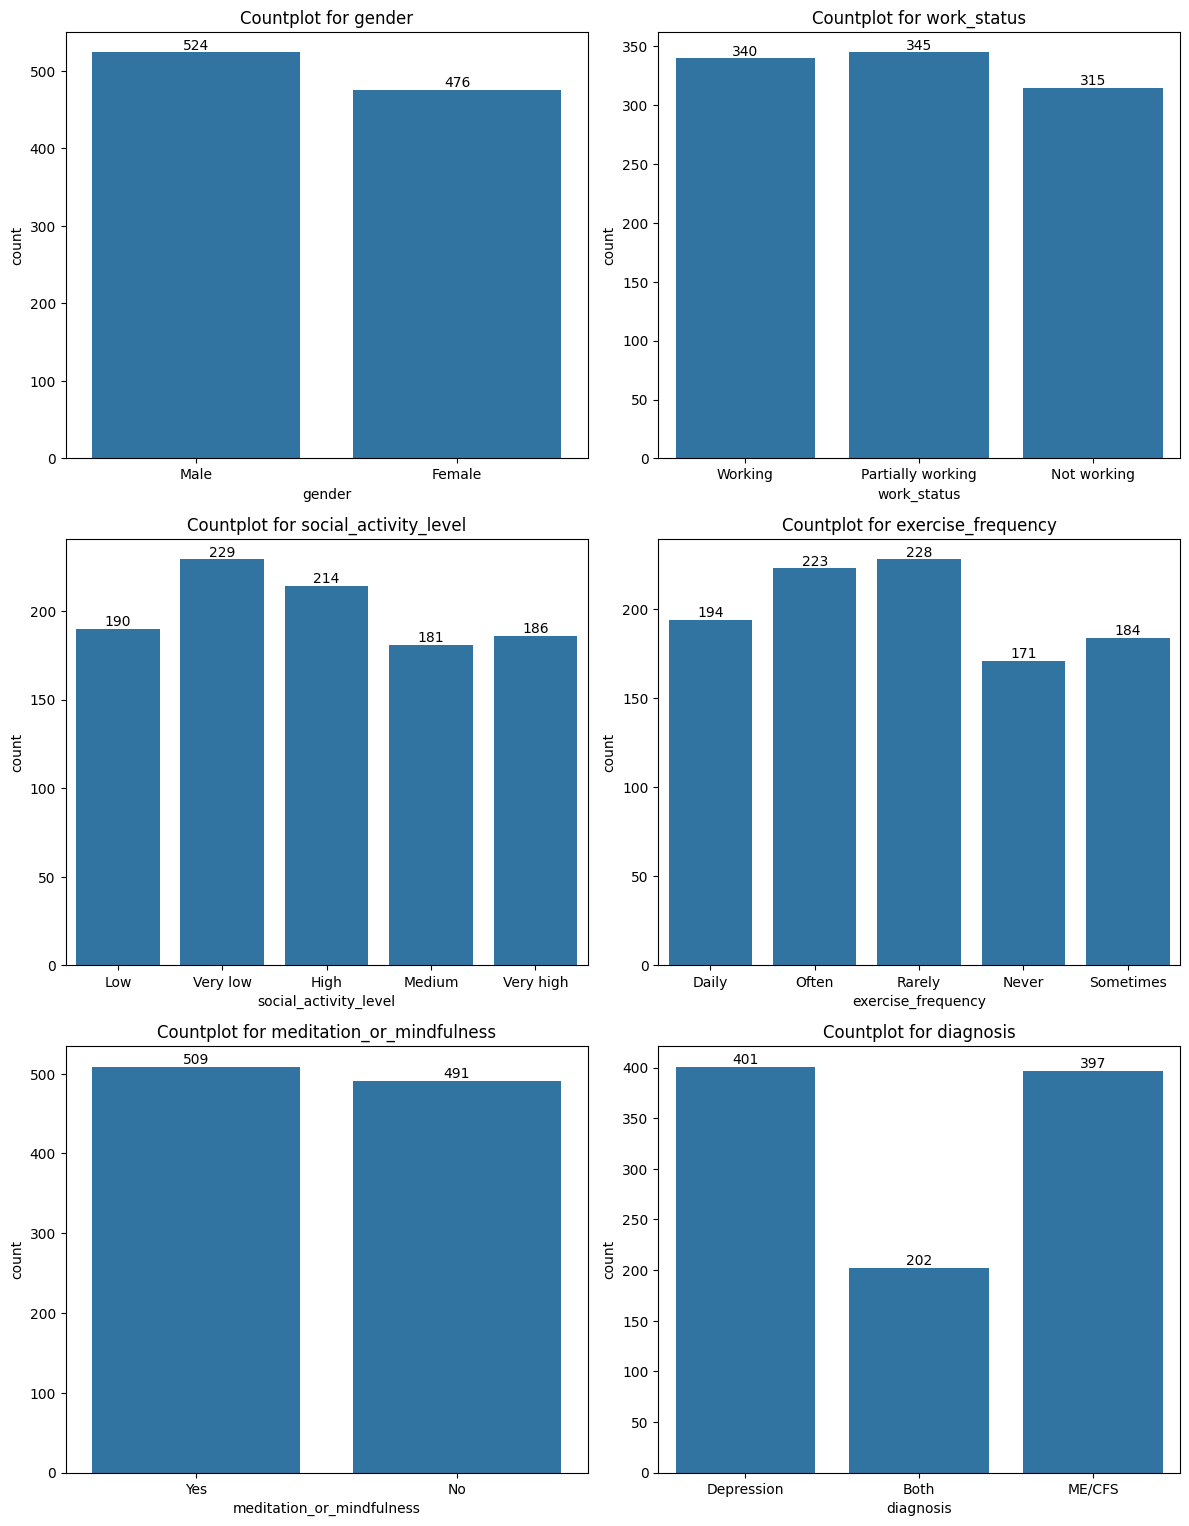

In [21]:
plt.figure(figsize=(12,20))
for i in range(len(cat_cols)):
  plt.subplot(4,2,i+1)
  ax = sns.countplot(x=df[cat_cols[i]])
  ax.bar_label(ax.containers[0])
  plt.title(f'Countplot for {cat_cols[i]}')

plt.tight_layout()
plt.show()

#### Bivariate - Cat-Cat

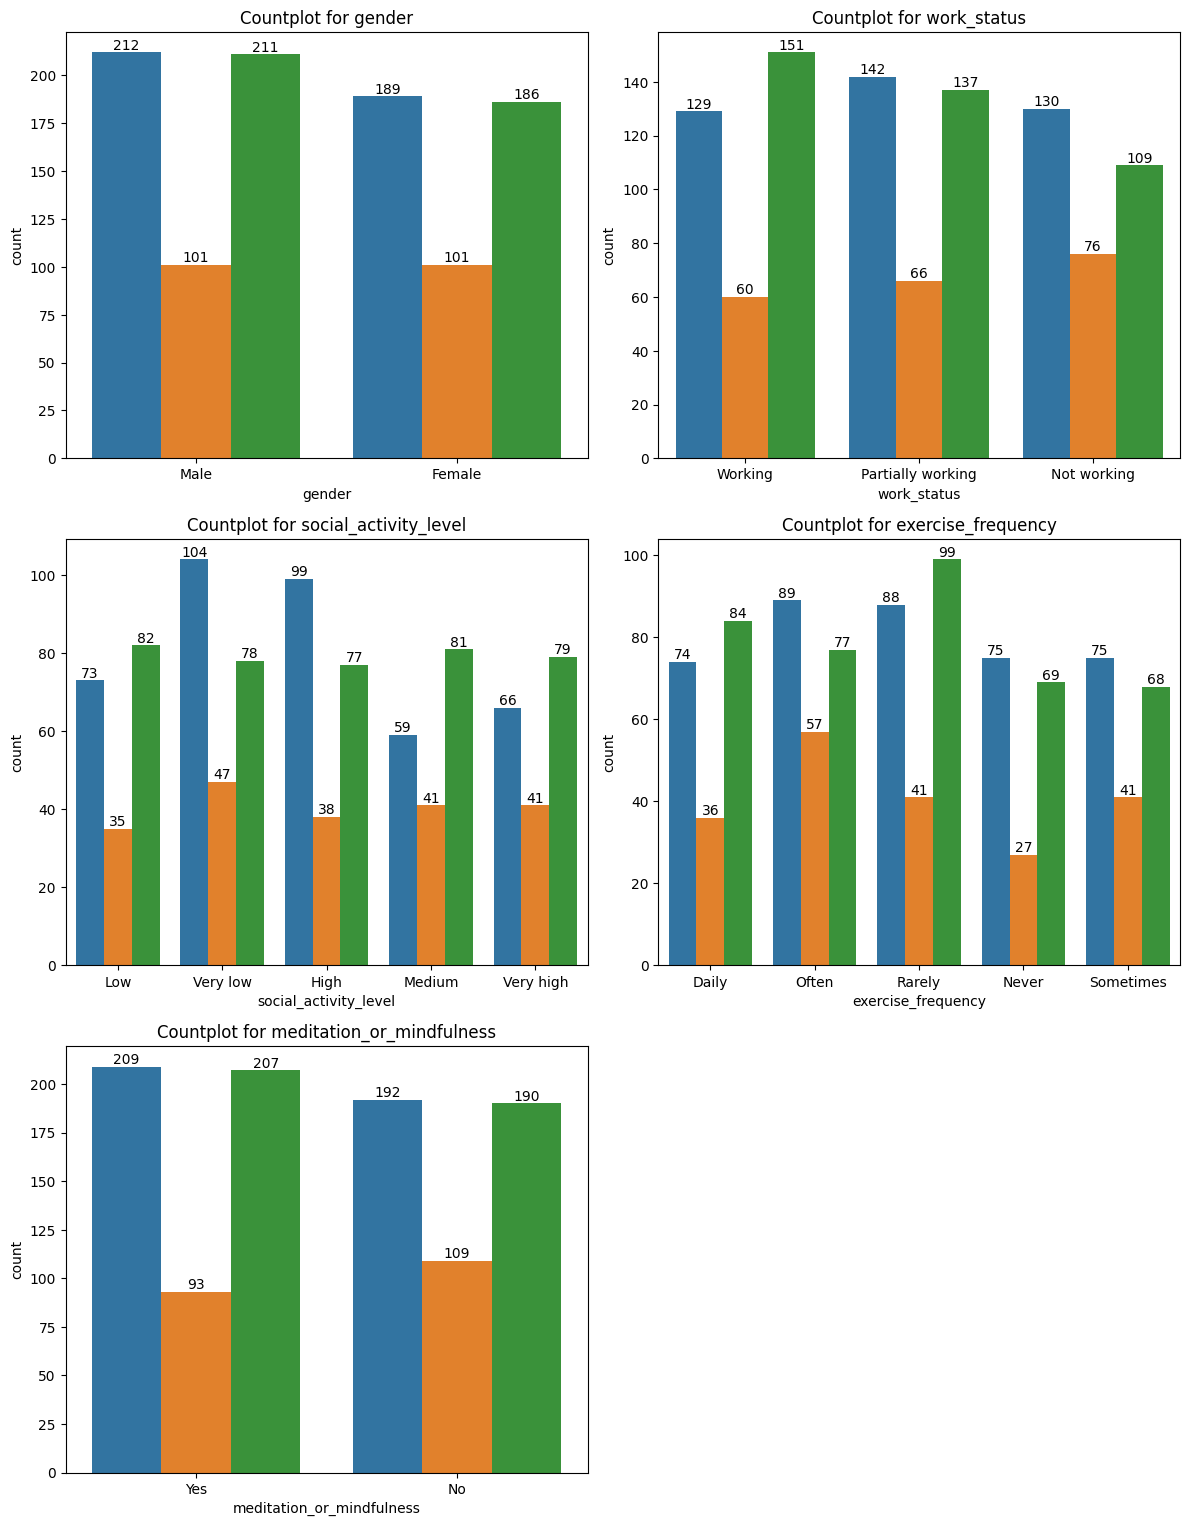

In [22]:
cols = cat_cols[:-1]
plt.figure(figsize=(12,20))
for i in range(len(cols)):
  plt.subplot(4,2,i+1)
  ax = sns.countplot(x=df[cols[i]],hue=df['diagnosis'],legend=False)
  ax.bar_label(ax.containers[0])
  ax.bar_label(ax.containers[1])
  ax.bar_label(ax.containers[2])
  plt.title(f'Countplot for {cols[i]}')
  # plt.legend(loc='best')

plt.tight_layout()
plt.show()

#### Univariate - Num Cols

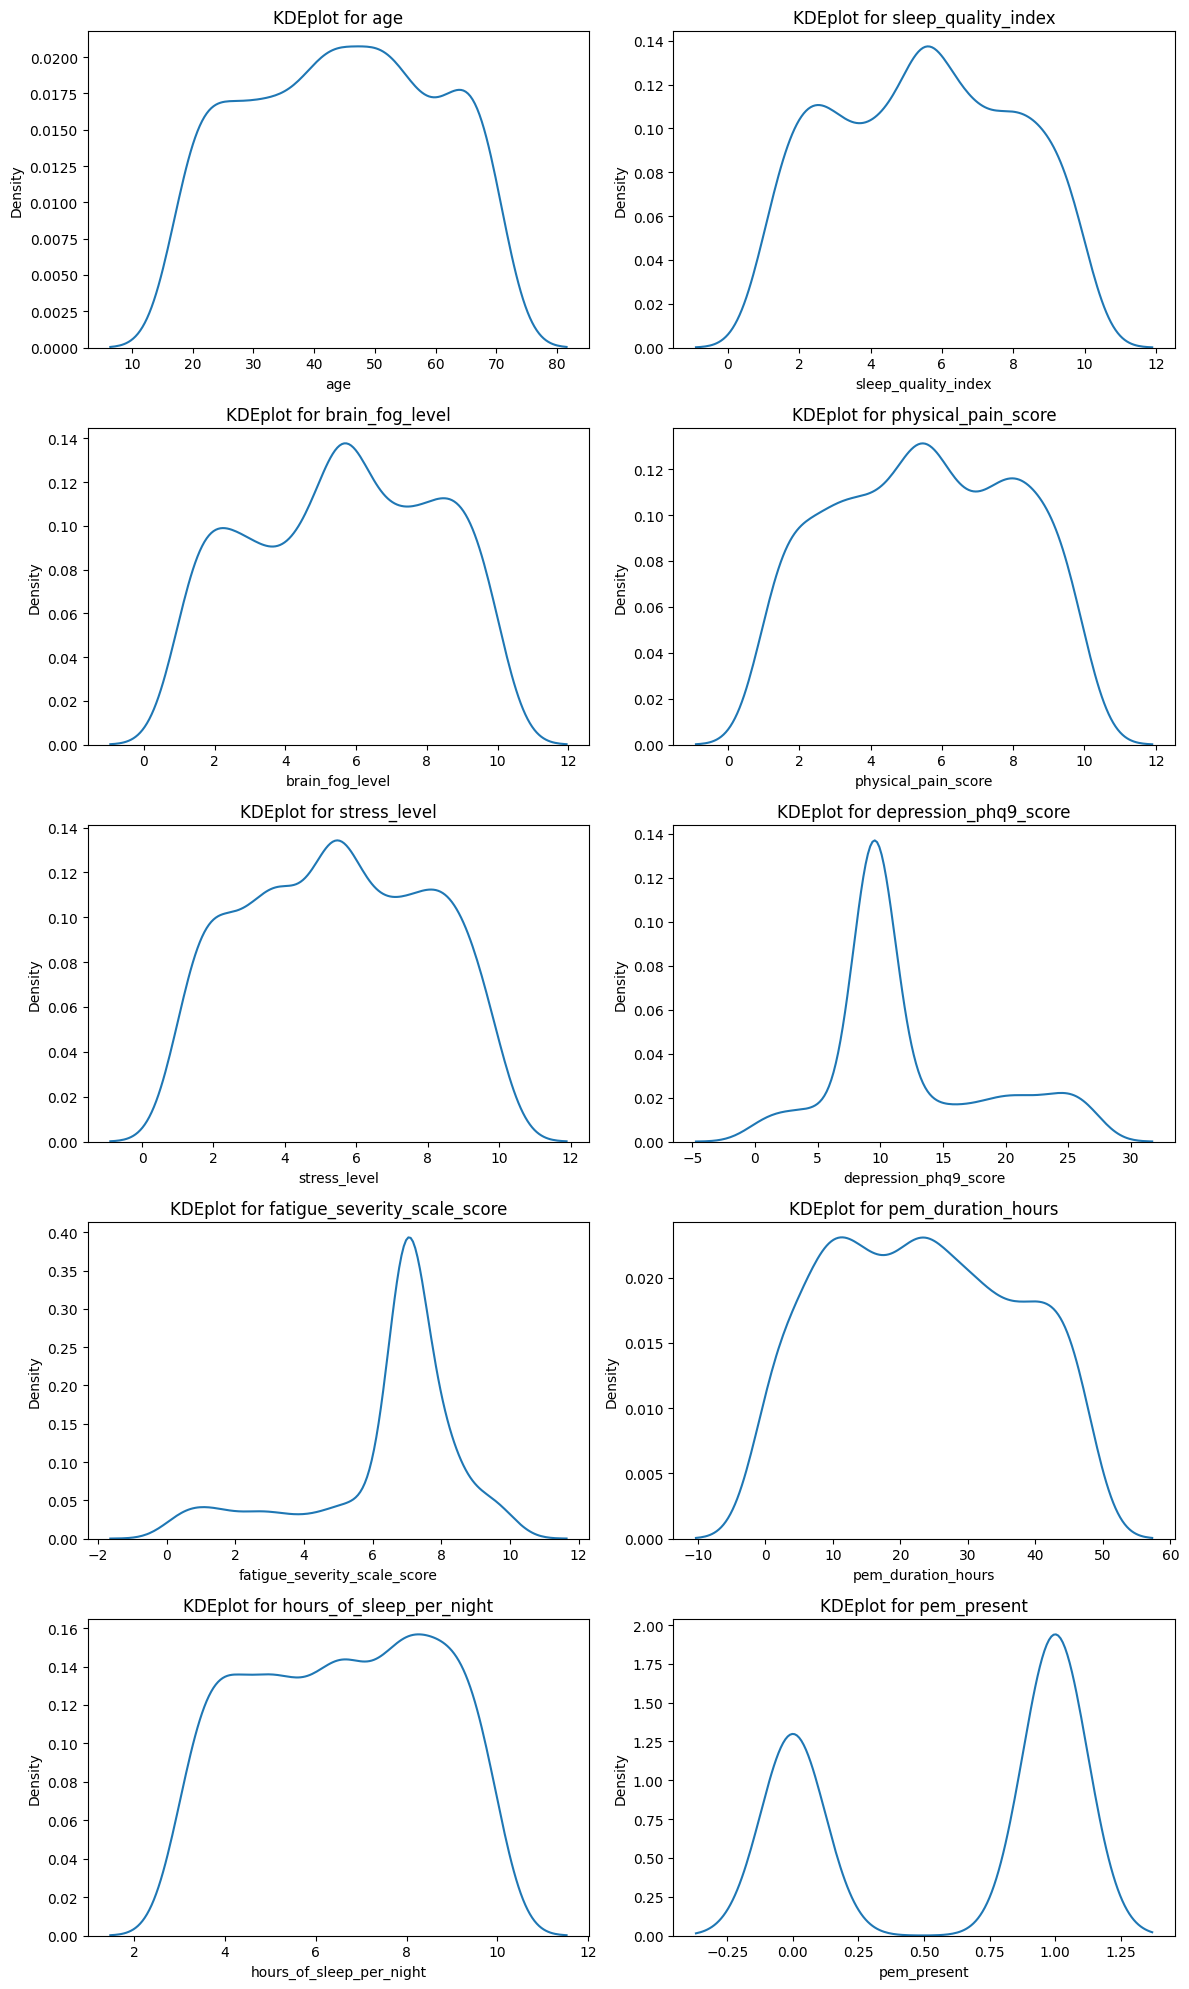

In [23]:
plt.figure(figsize=(12,20))
for i in range(len(num_cols)):
  plt.subplot(5,2,i+1)
  sns.kdeplot(x=df[num_cols[i]])
  plt.title(f'KDEplot for {num_cols[i]}')
plt.tight_layout()
plt.show()

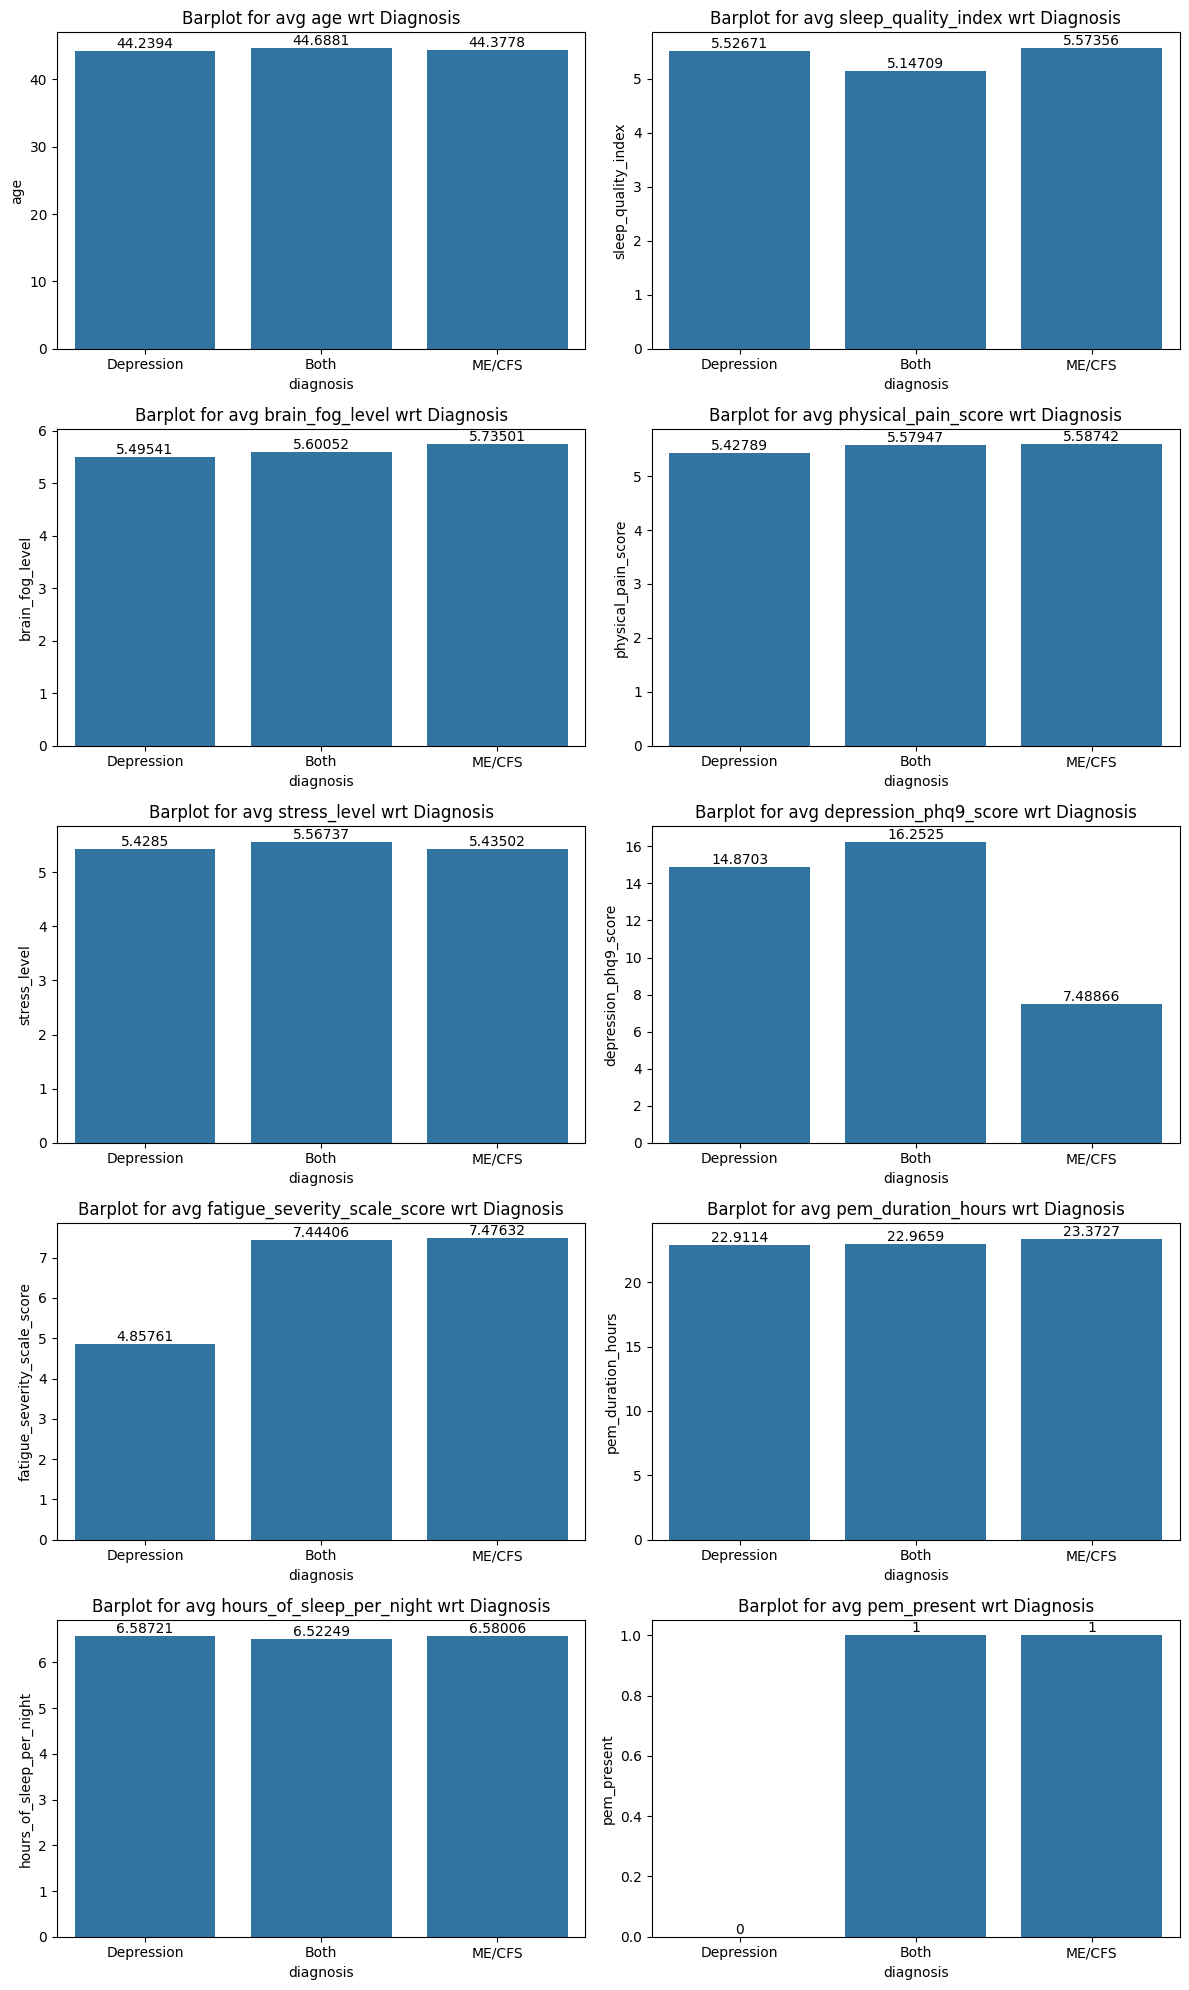

In [24]:
plt.figure(figsize=(12,20))
for i in range(len(num_cols)):
  plt.subplot(5,2,i+1)
  ax = sns.barplot(y=df[num_cols[i]],x=df['diagnosis'],errorbar=('ci',0))
  ax.bar_label(ax.containers[0])
  plt.title(f'Barplot for avg {num_cols[i]} wrt Diagnosis')
plt.tight_layout()
plt.show()

##### Outlier Treatment

In [25]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,18.0,18.00,18.000,19.000,20.0,45.000000,68.000,69.000,70.000,70.0,70.0
sleep_quality_index,1.0,1.10,1.200,1.300,1.5,5.468625,9.500,9.700,9.800,9.9,10.0
brain_fog_level,1.0,1.10,1.198,1.300,1.4,5.611765,9.600,9.800,9.802,9.9,10.0
physical_pain_score,1.0,1.10,1.100,1.200,1.4,5.521843,9.500,9.603,9.800,9.9,10.0
stress_level,1.0,1.10,1.200,1.297,1.5,5.459139,9.400,9.700,9.800,9.9,10.0
depression_phq9_score,0.0,0.99,1.000,2.000,3.0,10.000000,25.000,26.000,26.000,27.0,27.0
fatigue_severity_scale_score,0.0,0.30,0.500,0.700,1.1,7.000000,9.200,9.500,9.700,9.8,10.0
pem_duration_hours,0.0,0.00,0.000,1.000,2.0,23.000000,46.000,46.000,47.000,47.0,47.0
hours_of_sleep_per_night,3.0,3.10,3.100,3.200,3.3,6.585649,9.605,9.800,9.900,9.9,10.0
pem_present,0.0,0.00,0.000,0.000,0.0,1.000000,1.000,1.000,1.000,1.0,1.0


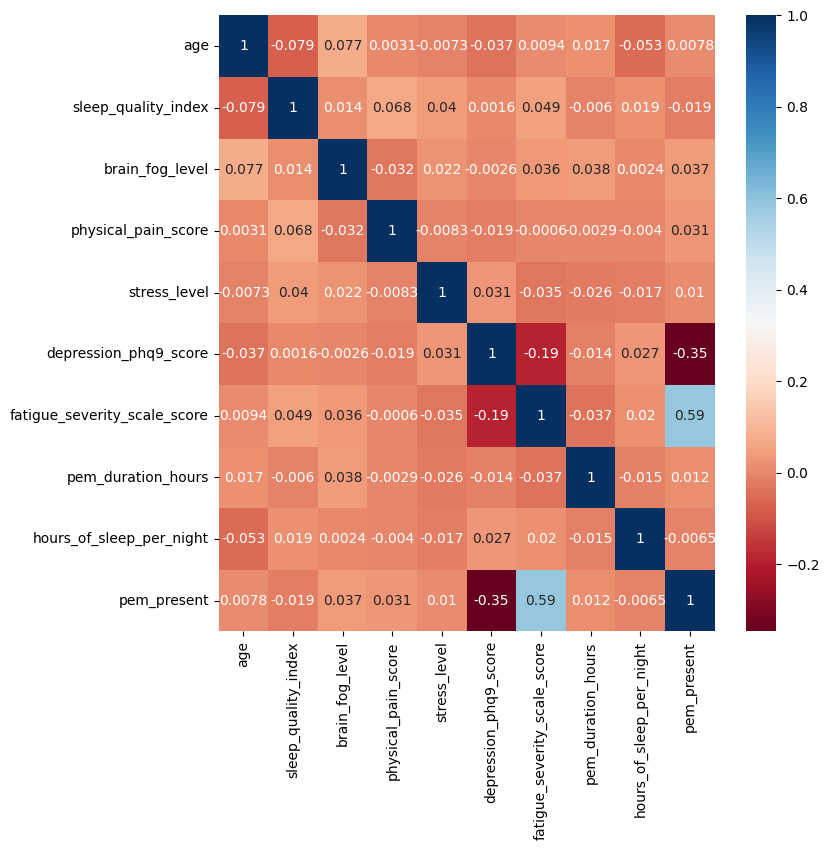

In [26]:
corr = df[num_cols].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [27]:
#### Encoding
cols_2encode = cat_cols[:-1]
print(cols_2encode)

df_dummies = pd.get_dummies(data=df,columns=cols_2encode,drop_first=True,dtype=int)
print(df_dummies.shape)
df_dummies.head()


Index(['gender', 'work_status', 'social_activity_level', 'exercise_frequency',
       'meditation_or_mindfulness'],
      dtype='object')
(1000, 23)


,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,...,work_status_Working,social_activity_level_Low,social_activity_level_Medium,social_activity_level_Very high,social_activity_level_Very low,exercise_frequency_Never,exercise_frequency_Often,exercise_frequency_Rarely,exercise_frequency_Sometimes,meditation_or_mindfulness_Yes
0,56,8.7,3.9,9.2,8.100000,10.0,6.5,9.0,7.7,0,...,1,1,0,0,0,0,0,0,0,1
1,69,1.3,9.9,4.2,9.900000,20.0,7.0,41.0,8.4,1,...,1,1,0,0,0,0,1,0,0,1
2,46,4.0,5.4,4.8,5.459139,24.0,1.6,13.0,6.9,0,...,0,0,0,0,1,0,0,1,0,1
3,32,9.4,2.1,2.9,3.800000,10.0,6.8,11.0,7.5,0,...,0,0,0,0,0,1,0,0,0,1
4,60,7.6,7.5,6.4,8.500000,17.0,7.0,46.0,3.1,1,...,0,1,0,0,0,0,0,1,0,0


#### Select x and y

In [28]:
x = df_dummies.drop('diagnosis',axis=1)
y = df_dummies['diagnosis']
print(x.shape)
print(y.shape)

(1000, 22)
(1000,)


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(800, 22) (200, 22)
(800,) (200,)


In [31]:
from sklearn.metrics import *

In [32]:
def eval_model(model, ytest,ypred):
  print('Train Score',model.score(x_train,y_train))
  print('Test Score',model.score(x_test,y_test))
  print(confusion_matrix(ytest,ypred))
  print(classification_report(ytest,ypred))

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [34]:
# Log Reg
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
ypred = lr.predict(x_test)
eval_model(lr,y_test,ypred)

Train Score 0.99125
Test Score 0.995
[[41  0  0]
 [ 0 80  0]
 [ 1  0 78]]
              precision    recall  f1-score   support

        Both       0.98      1.00      0.99        41
  Depression       1.00      1.00      1.00        80
      ME/CFS       1.00      0.99      0.99        79

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [35]:
#### KNN
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)
eval_model(knn,y_test,ypred)

Train Score 0.71375
Test Score 0.65
[[ 5 18 18]
 [14 53 13]
 [ 0  7 72]]
              precision    recall  f1-score   support

        Both       0.26      0.12      0.17        41
  Depression       0.68      0.66      0.67        80
      ME/CFS       0.70      0.91      0.79        79

    accuracy                           0.65       200
   macro avg       0.55      0.57      0.54       200
weighted avg       0.60      0.65      0.62       200



In [36]:
# DT
dt = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=10)
dt.fit(x_train,y_train)
ypred = dt.predict(x_test)
eval_model(dt,y_test,ypred)

Train Score 0.99125
Test Score 0.995
[[41  0  0]
 [ 0 80  0]
 [ 1  0 78]]
              precision    recall  f1-score   support

        Both       0.98      1.00      0.99        41
  Depression       1.00      1.00      1.00        80
      ME/CFS       1.00      0.99      0.99        79

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [37]:
# RF
rf = RandomForestClassifier(n_estimators=75,criterion='entropy',max_depth=9,min_samples_split=10)
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)
eval_model(rf,y_test,ypred)

Train Score 0.9925
Test Score 0.995
[[41  0  0]
 [ 0 80  0]
 [ 1  0 78]]
              precision    recall  f1-score   support

        Both       0.98      1.00      0.99        41
  Depression       1.00      1.00      1.00        80
      ME/CFS       1.00      0.99      0.99        79

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



#### Model Saving

In [38]:
import pickle

In [ ]:
pickle.dump(lr,open('/content/drive/MyDrive/PGA53/Model_Web_App/lr_cfs.pkl','wb'))  # wb = write binary
pickle.dump(dt,open('/content/drive/MyDrive/PGA53/Model_Web_App/dt_cfs.pkl','wb'))
pickle.dump(rf,open('/content/drive/MyDrive/PGA53/Model_Web_App/rf_cfs.pkl','wb'))

In [39]:
pickle.dump(df,open('/content/drive/MyDrive/PGA53/Model_Web_App/data.pkl','wb'))

In [42]:
x_train.head()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,...,work_status_Working,social_activity_level_Low,social_activity_level_Medium,social_activity_level_Very high,social_activity_level_Very low,exercise_frequency_Never,exercise_frequency_Often,exercise_frequency_Rarely,exercise_frequency_Sometimes,meditation_or_mindfulness_Yes
254,22,4.6,5.9,5.200000,9.0,9.0,8.8,18.0,8.5,1,...,1,0,0,1,0,0,1,0,0,1
25,19,8.8,3.8,5.521843,9.0,10.0,6.8,8.0,6.0,0,...,0,0,0,1,0,1,0,0,0,1
588,48,4.3,4.1,5.100000,7.1,12.0,3.6,22.0,3.8,0,...,0,0,1,0,0,1,0,0,0,1
93,62,3.7,6.0,5.400000,3.7,15.0,6.0,21.0,8.4,0,...,0,1,0,0,0,0,0,0,1,1
536,43,8.4,7.5,3.000000,6.7,25.0,6.3,43.0,6.9,0,...,0,0,0,0,1,0,0,1,0,1


In [48]:
print(df.columns,len(df.columns))
x_train.columns

Index(['age', 'gender', 'sleep_quality_index', 'brain_fog_level',
       'physical_pain_score', 'stress_level', 'depression_phq9_score',
       'fatigue_severity_scale_score', 'pem_duration_hours',
       'hours_of_sleep_per_night', 'pem_present', 'work_status',
       'social_activity_level', 'exercise_frequency',
       'meditation_or_mindfulness', 'diagnosis'],
      dtype='object') 16


Index(['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score',
       'stress_level', 'depression_phq9_score', 'fatigue_severity_scale_score',
       'pem_duration_hours', 'hours_of_sleep_per_night', 'pem_present',
       'gender_Male', 'work_status_Partially working', 'work_status_Working',
       'social_activity_level_Low', 'social_activity_level_Medium',
       'social_activity_level_Very high', 'social_activity_level_Very low',
       'exercise_frequency_Never', 'exercise_frequency_Often',
       'exercise_frequency_Rarely', 'exercise_frequency_Sometimes',
       'meditation_or_mindfulness_Yes'],
      dtype='object')

In [41]:
x_train.describe()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,...,work_status_Working,social_activity_level_Low,social_activity_level_Medium,social_activity_level_Very high,social_activity_level_Very low,exercise_frequency_Never,exercise_frequency_Often,exercise_frequency_Rarely,exercise_frequency_Sometimes,meditation_or_mindfulness_Yes
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,44.598750,5.437877,5.567324,5.540971,5.476082,12.167500,6.401750,23.107506,6.632587,0.598750,...,0.342500,0.181250,0.170000,0.196250,0.235000,0.178750,0.22750,0.220000,0.186250,0.522500
std,15.257416,2.506933,2.575103,2.527184,2.545466,6.135267,2.186996,13.517382,2.039968,0.490458,...,0.474843,0.385466,0.375868,0.397408,0.424264,0.383383,0.41948,0.414505,0.389552,0.499806
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.000000,3.200000,3.400000,3.500000,3.400000,9.000000,6.400000,12.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,5.468625,5.611765,5.521843,5.459139,10.000000,7.000000,23.000000,6.700000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,57.000000,7.600000,7.700000,7.700000,7.600000,15.000000,7.300000,34.000000,8.400000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [47]:
df['exercise_frequency'].value_counts()

,count
exercise_frequency,
Rarely,228
Often,223
Daily,194
Sometimes,184
Never,171


In [43]:
df['work_status'].value_counts()

,count
work_status,
Partially working,345
Working,340
Not working,315


In [ ]:
# 1) Model Building
# 2) Model Saving
# 3) VS Code configuration - python, venv
# 4) venc - library install
# 5) Web App Frameworks -  Streamlit, Flask, FastAPI, Django -
# 6) Model Deploy -  Streamlit cloud, AWS, Azure, GCP
# 7) Download  - Putty, WinScp

In [ ]:
x_train.head()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,...,work_status_Working,social_activity_level_Low,social_activity_level_Medium,social_activity_level_Very high,social_activity_level_Very low,exercise_frequency_Never,exercise_frequency_Often,exercise_frequency_Rarely,exercise_frequency_Sometimes,meditation_or_mindfulness_Yes
254,22,4.6,5.9,5.200000,9.0,9.0,8.8,18.0,8.5,1,...,1,0,0,1,0,0,1,0,0,1
25,19,8.8,3.8,5.521843,9.0,10.0,6.8,8.0,6.0,0,...,0,0,0,1,0,1,0,0,0,1
588,48,4.3,4.1,5.100000,7.1,12.0,3.6,22.0,3.8,0,...,0,0,1,0,0,1,0,0,0,1
93,62,3.7,6.0,5.400000,3.7,15.0,6.0,21.0,8.4,0,...,0,1,0,0,0,0,0,0,1,1
536,43,8.4,7.5,3.000000,6.7,25.0,6.3,43.0,6.9,0,...,0,0,0,0,1,0,0,1,0,1


In [49]:
df['diagnosis'].unique()

array(['Depression', 'Both', 'ME/CFS'], dtype=object)